In [108]:
import numpy as np
import seaborn as sb
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt
from sklearn import svm, preprocessing

#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
from sklearn import svm
from sklearn.neighbors import (NeighborhoodComponentsAnalysis, KNeighborsClassifier)


#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFECV

#cross validation
from sklearn.model_selection import train_test_split

In [5]:
rawData = pd.read_csv('CreditOne2.csv', header=1)

In [6]:
rawData.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [7]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 24 columns):
LIMIT_BAL                     20000 non-null int64
SEX                           20000 non-null int64
EDUCATION                     20000 non-null int64
MARRIAGE                      20000 non-null int64
AGE                           20000 non-null int64
PAY_0                         20000 non-null int64
PAY_2                         20000 non-null int64
PAY_3                         20000 non-null int64
PAY_4                         20000 non-null int64
PAY_5                         20000 non-null int64
PAY_6                         20000 non-null int64
BILL_AMT1                     20000 non-null int64
BILL_AMT2                     20000 non-null int64
BILL_AMT3                     20000 non-null int64
BILL_AMT4                     20000 non-null int64
BILL_AMT5                     20000 non-null int64
BILL_AMT6                     20000 non-null int64
PAY_AMT1                

In [8]:
features = rawData.iloc[:,12:23]

In [9]:
print('Summary of feature sample')

Summary of feature sample


In [10]:
features.head()

,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,3102,689,0,0,0,0,689,0,0,0,0
1,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [11]:
depVar = rawData['PAY_AMT6']

In [12]:
X_train = (features[: 14000])

In [13]:
X_train.head()

,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,3102,689,0,0,0,0,689,0,0,0,0
1,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [14]:
y_train = depVar[: 14000]

In [15]:
y_train_count = len(y_train.index)

In [16]:
print('The number of observations in the Y training set are:',str(y_train_count))

The number of observations in the Y training set are: 14000


In [17]:
y_train.head()

0       0
1    2000
2    5000
3    1000
4     679
Name: PAY_AMT6, dtype: int64

In [18]:
#Testing Set (X Testing)
X_test = features[-6000:]

In [19]:
X_test_count = len(X_test.index)

In [20]:
print('The number of observations in the feature testing set is:',str(X_test_count))

The number of observations in the feature testing set is: 6000


In [21]:
print(X_test.head())

       BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  \
14000      15252      18093      18499      20898      19999         0   
14001      75329      64228      49103      48649      49701      3000   
14002      31546      28405      27959      27785      28123      1746   
14003      52163      51060      54200      52734      55903      2460   
14004      29803      30766      29918      29071      29527      3582   

       PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
14000      3103      1000      3000         0         0  
14001      2500      1800      2000      1800      2000  
14002      1800      1729       945      1149      1200  
14003         0      4600         0      4200      2200  
14004      1734         0      1148      1034      2667  


In [22]:
#Ground Truth (y_test) 
y_test = depVar[-6000:]

In [23]:
y_test_count = len(y_test.index)

In [24]:
print('The number of observations in the Y training set are:',str(y_test_count))

The number of observations in the Y training set are: 6000


In [25]:
y_test.head()

14000       0
14001    2000
14002    1200
14003    2200
14004    2667
Name: PAY_AMT6, dtype: int64

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)

In [27]:
X_train.shape, X_test.shape

((10500, 11), (3500, 11))

In [28]:
#Models
modelSVR = SVR()
modelRF = RandomForestRegressor()
modelLR = LinearRegression()

In [29]:
features = rawData.iloc[:,12:23]

In [30]:
print('Summary of feature sample')

Summary of feature sample


In [31]:
features.head()

,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,3102,689,0,0,0,0,689,0,0,0,0
1,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [32]:
print(depVar)

0            0
1         2000
2         5000
3         1000
4          679
         ...  
19995    24952
19996        0
19997      808
19998     5450
19999    20000
Name: PAY_AMT6, Length: 20000, dtype: int64


In [33]:
modelRF.fit(X_train,y_train)

C:\Users\bosed\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [34]:
modelSVR.fit(X_train,y_train)

C:\Users\bosed\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [35]:
modelLR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
print(cross_val_score(modelRF, X_train, y_train)) 

C:\Users\bosed\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.99399774 0.9583535  0.99927102]


In [37]:
modelRF.score(X_train,y_train)

0.9960633172022691

In [38]:
modelSVR.fit (X_train,y_train)

C:\Users\bosed\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [39]:
print(cross_val_score(modelSVR, X_train, y_train)) 

C:\Users\bosed\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\bosed\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bosed\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bosed\AppData\Local\Continuum\anaconda3\lib\site-pac

[-0.04339587 -0.04000532 -0.04652193]


In [40]:
modelSVR.score(X_train,y_train)

-0.04239426072561247

In [41]:
modelLR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
print(cross_val_score(modelLR, X_train, y_train)) 

[1. 1. 1.]


C:\Users\bosed\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [43]:
modelLR.score(X_train,y_train)

1.0

In [44]:
predictions = modelRF.predict(X_test)

In [45]:
predRsquared = r2_score(y_test,predictions)

In [46]:
rmse = sqrt(mean_squared_error(y_test, predictions))

In [47]:
print('R Squared: %.3f' % predRsquared)

R Squared: 0.998


In [48]:
print('RMSE: %.3f' % rmse)

RMSE: 657.296


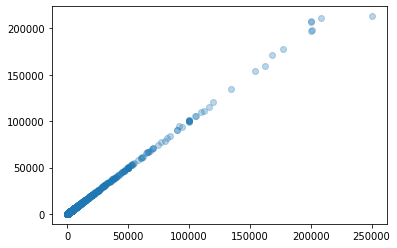

In [49]:
plt.scatter(y_test, predictions, alpha = 0.3)

Text(0.5, 0, 'Ground Truth')

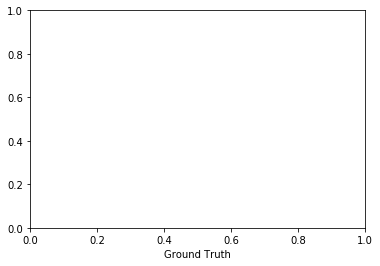

In [50]:
plt.xlabel('Ground Truth')

Text(0, 0.5, 'Predictions')

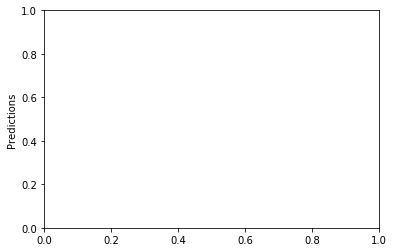

In [51]:
plt.ylabel('Predictions')

In [52]:
plt.show()

In [53]:
print ('classification Problem, Age as a Dep Var')

classification Problem, Age as a Dep Var


In [75]:
depVar2 = rawData['AGE']

In [76]:
features2 = rawData.iloc[:,1:23]

In [77]:
features2.corr()

,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
SEX,1.000000,0.016921,-0.033133,-0.098017,-0.056156,-0.067737,-0.066753,-0.057550,-0.056291,-0.042272,...,-0.027495,-0.025220,-0.019603,-0.019442,0.000594,-0.011708,-0.012763,-0.001795,-0.005272,-0.000058
EDUCATION,0.016921,1.000000,-0.146059,0.171331,0.109041,0.128522,0.112458,0.108497,0.101877,0.083193,...,0.014464,0.001464,-0.004296,-0.004014,-0.034836,-0.033130,-0.035829,-0.036519,-0.030035,-0.033373
MARRIAGE,-0.033133,-0.146059,1.000000,-0.412378,0.015699,0.021222,0.028741,0.027086,0.035906,0.031745,...,-0.030597,-0.028220,-0.030127,-0.026355,-0.013734,-0.017662,-0.013353,-0.018997,-0.003528,-0.008254
AGE,-0.098017,0.171331,-0.412378,1.000000,-0.039253,-0.052860,-0.055680,-0.044196,-0.049678,-0.041433,...,0.050625,0.048279,0.047117,0.047191,0.023944,0.022901,0.034960,0.023709,0.027647,0.020914
PAY_0,-0.056156,0.109041,0.015699,-0.039253,1.000000,0.673396,0.576507,0.538147,0.505374,0.470655,...,0.176990,0.177065,0.181207,0.178143,-0.090755,-0.077181,-0.073475,-0.065857,-0.054812,-0.065083
PAY_2,-0.067737,0.128522,0.021222,-0.052860,0.673396,1.000000,0.770877,0.666042,0.624552,0.577192,...,0.226137,0.225624,0.227666,0.225200,-0.085676,-0.064798,-0.054942,-0.047351,-0.035776,-0.042575
PAY_3,-0.066753,0.112458,0.028741,-0.055680,0.576507,0.770877,1.000000,0.776827,0.686180,0.629024,...,0.229585,0.229721,0.229995,0.226666,0.001018,-0.068165,-0.052179,-0.047636,-0.036919,-0.042152
PAY_4,-0.057550,0.108497,0.027086,-0.044196,0.538147,0.666042,0.776827,1.000000,0.817024,0.709960,...,0.248223,0.249529,0.249232,0.244680,-0.009754,0.001366,-0.069793,-0.041959,-0.037404,-0.029769
PAY_5,-0.056291,0.101877,0.035906,-0.049678,0.505374,0.624552,0.686180,0.817024,1.000000,0.811450,...,0.248177,0.277892,0.277251,0.269628,-0.008333,-0.003755,0.012249,-0.058728,-0.036970,-0.028062
PAY_6,-0.042272,0.083193,0.031745,-0.041433,0.470655,0.577192,0.629024,0.709960,0.811450,1.000000,...,0.243447,0.269225,0.295400,0.289878,-0.004892,-0.009141,0.005062,0.021263,-0.049437,-0.029801


In [78]:
drop_list = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4','PAY_5','PAY_6']

In [79]:
features2 = features2.drop (drop_list, axis=1)

In [80]:
X_train2 = (features2[: 14000])

In [81]:
X_train2.head()

,SEX,EDUCATION,MARRIAGE,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,2,2,1,24,3913,3102,689,0,0,0,0,689,0,0,0,0
1,2,2,2,26,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,2,2,2,34,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,2,2,1,37,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,1,2,1,57,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [82]:
y_train2 = depVar2[: 14000]

In [83]:
y_train2.head()

0    24
1    26
2    34
3    37
4    57
Name: AGE, dtype: int64

In [84]:
#Testing Set (X Testing)
X_test2 = features2[-6000:]

In [85]:
X_test2_count = len(X_test2.index)

In [86]:
print('The number of observations in the Y training set are:',str(X_test2_count))

The number of observations in the Y training set are: 6000


In [87]:
print(X_test2.head())

       SEX  EDUCATION  MARRIAGE  AGE  BILL_AMT1  BILL_AMT2  BILL_AMT3  \
14000    2          2         1   26      15803      15252      18093   
14001    2          3         1   37      77480      75329      64228   
14002    2          2         1   42      30640      31546      28405   
14003    2          3         1   35      50834      52163      51060   
14004    2          2         1   38      26664      29803      30766   

       BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
14000      18499      20898      19999         0      3103      1000   
14001      49103      48649      49701      3000      2500      1800   
14002      27959      27785      28123      1746      1800      1729   
14003      54200      52734      55903      2460         0      4600   
14004      29918      29071      29527      3582      1734         0   

       PAY_AMT4  PAY_AMT5  PAY_AMT6  
14000      3000         0         0  
14001      2000      1800      2000  
14002       94

In [88]:
#Ground Truth (y_test) 
y_test2 = depVar2[-6000:]

In [89]:
y_test2_count = len(y_test2.index)

In [90]:
print('The number of observations in the Y training set are:',str(y_test2_count))

The number of observations in the Y training set are: 6000


In [91]:
y_test2.head()

14000    26
14001    37
14002    42
14003    35
14004    38
Name: AGE, dtype: int64

In [92]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train2, y_train2)

In [93]:
X_train2.shape, X_test2.shape

((10500, 16), (3500, 16))

In [94]:
#Models
modelSVM = svm.SVC(gamma='scale')
modelGB = GradientBoostingClassifier(n_estimators=1000, learning_rate=1.0, max_depth=3, random_state=1)
modelTree = tree.DecisionTreeClassifier()
modelKnn = KNeighborsClassifier(n_neighbors=3)
modelNCA = NeighborhoodComponentsAnalysis(random_state=1)

In [98]:
modelSVM.fit(X_train2,y_train2)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [99]:
modelGB.fit(X_train2,y_train2)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=1.0, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=1000,
                           n_iter_no_change=None, presort='auto',
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [100]:
modelTree.fit(X_train2,y_train2)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [101]:
print(cross_val_score(modelSVM, X_train2, y_train2)) 

C:\Users\bosed\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\bosed\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


[0.05454545 0.06258931 0.0634875 ]


In [102]:
print(cross_val_score(modelGB, X_train2, y_train2)) 

C:\Users\bosed\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\bosed\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


[0.99886364 0.9997142  0.99971273]


In [103]:
print(cross_val_score(modelTree, X_train2, y_train2)) 

C:\Users\bosed\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\bosed\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


[0.99857955 0.99914261 0.99971273]


In [104]:
modelKnn.fit(X_train2,y_train2)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [105]:
print(cross_val_score(modelKnn, X_train2, y_train2)) 

C:\Users\bosed\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\bosed\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


[0.07045455 0.0631609  0.06549842]


In [113]:
features2 = np.random.rand(10,12)

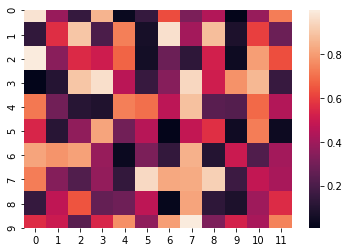

In [114]:
heat_map = sb.heatmap(features2)